# Cardio Good Fitness Project

## Import Main Libraries

In [1]:
# import appropriate libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")   # set background
import warnings
warnings.filterwarnings("ignore")   # ignore warnings

## Inspect Dataset Structure

In [2]:
cardiodata = pd.read_csv("CardioGoodFitness.csv")   # load dataset

In [3]:
cardiodata.shape   # check dataset shape (number of rows/columns)

(180, 9)

In [4]:
cardiodata.head()   # check first 5 rows

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
cardiodata.tail()   # check last 5 rows

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [6]:
cardiodata.sample(10)   # generate small sample of dataset

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
174,TM798,38,Male,18,Partnered,5,5,104581,150
130,TM498,35,Female,16,Single,3,2,50028,64
45,TM195,28,Female,16,Partnered,2,3,52302,66
73,TM195,40,Male,16,Partnered,3,3,61398,66
139,TM498,48,Male,16,Partnered,2,3,57987,64
71,TM195,38,Male,16,Partnered,3,3,56850,75
156,TM798,25,Male,20,Partnered,4,5,74701,170
169,TM798,30,Male,18,Partnered,5,5,99601,150
92,TM498,23,Female,14,Single,3,2,40932,53
176,TM798,42,Male,18,Single,5,4,89641,200


In [7]:
cardiodata.dtypes   # check feature datatypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [8]:
cardiodata.isnull().sum()   # check for missing values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [9]:
for col in list(cardiodata):
    print(col, ":", np.sort(cardiodata[col].unique()))   # list unique values for each feature

Product : ['TM195' 'TM498' 'TM798']
Age : [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 50]
Gender : ['Female' 'Male']
Education : [12 13 14 15 16 18 20 21]
MaritalStatus : ['Partnered' 'Single']
Usage : [2 3 4 5 6 7]
Fitness : [1 2 3 4 5]
Income : [ 29562  30699  31836  32973  34110  35247  36384  37521  38658  39795
  40932  42069  43206  44343  45480  46617  47754  48556  48658  48891
  49801  50028  51165  52290  52291  52302  53439  53536  54576  54781
  55713  56850  57271  57987  58516  59124  60261  61006  61398  62251
  62535  64741  64809  65220  67083  68220  69721  70966  74701  75946
  77191  83416  85906  88396  89641  90886  92131  95508  95866  99601
 103336 104581]
Miles : [ 21  38  42  47  53  56  64  66  74  75  80  85  94  95 100 103 106 112
 113 120 127 132 140 141 150 160 169 170 180 188 200 212 240 260 280 300
 360]


## Explore Dataset

In [10]:
cardiodata.describe(include='all').round()   # generate statistical summary

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.0,180,180.0,180,180.0,180.0,180.0,180.0
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,29.0,NaN,16.0,NaN,3.0,3.0,53720.0,103.0
std,NaN,7.0,NaN,2.0,NaN,1.0,1.0,16507.0,52.0
min,NaN,18.0,NaN,12.0,NaN,2.0,1.0,29562.0,21.0
25%,NaN,24.0,NaN,14.0,NaN,3.0,3.0,44059.0,66.0
50%,NaN,26.0,NaN,16.0,NaN,3.0,3.0,50596.0,94.0
75%,NaN,33.0,NaN,16.0,NaN,4.0,4.0,58668.0,115.0


In [11]:
print(cardiodata['Product'].value_counts())   # check number of customers by Model

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64


In [12]:
cardiodata[cardiodata['Product'] == 'TM195'].describe().round(2)   # statistical summary for TM195 customers

,Age,Education,Usage,Fitness,Income,Miles
count,80.00,80.00,80.00,80.00,80.00,80.00
mean,28.55,15.04,3.09,2.96,46418.02,82.79
std,7.22,1.22,0.78,0.66,9075.78,28.87
min,18.00,12.00,2.00,1.00,29562.00,38.00
25%,23.00,14.00,3.00,3.00,38658.00,66.00
50%,26.00,16.00,3.00,3.00,46617.00,85.00
75%,33.00,16.00,4.00,3.00,53439.00,94.00
max,50.00,18.00,5.00,5.00,68220.00,188.00


In [13]:
cardiodata[cardiodata['Product'] == 'TM498'].describe().round(2)   # statistical summary for TM498 customers

,Age,Education,Usage,Fitness,Income,Miles
count,60.00,60.00,60.00,60.00,60.00,60.00
mean,28.90,15.12,3.07,2.90,48973.65,87.93
std,6.65,1.22,0.80,0.63,8653.99,33.26
min,19.00,12.00,2.00,1.00,31836.00,21.00
25%,24.00,14.00,3.00,3.00,44911.50,64.00
50%,26.00,16.00,3.00,3.00,49459.50,85.00
75%,33.25,16.00,3.25,3.00,53439.00,106.00
max,48.00,18.00,5.00,4.00,67083.00,212.00


In [14]:
cardiodata[cardiodata['Product'] == 'TM798'].describe().round(2)   # statistical summary for TM798 customers

,Age,Education,Usage,Fitness,Income,Miles
count,40.00,40.00,40.00,40.00,40.00,40.00
mean,29.10,17.32,4.78,4.62,75441.58,166.90
std,6.97,1.64,0.95,0.67,18505.84,60.07
min,22.00,14.00,3.00,3.00,48556.00,80.00
25%,24.75,16.00,4.00,4.00,58204.75,120.00
50%,27.00,18.00,5.00,5.00,76568.50,160.00
75%,30.25,18.00,5.00,5.00,90886.00,200.00
max,48.00,21.00,7.00,5.00,104581.00,360.00


In [15]:
cardiodata.groupby('Product').mean().reset_index()   # mean summary for all 3 models

,Product,Age,Education,Usage,Fitness,Income,Miles
0,TM195,28.55,15.037500,3.087500,2.9625,46418.025,82.787500
1,TM498,28.90,15.116667,3.066667,2.9000,48973.650,87.933333
2,TM798,29.10,17.325000,4.775000,4.6250,75441.575,166.900000


#### Observations:
- TM195 shows highest number of sales (assuming this is a basic/starter model).
- TM798 shows lowest number of sales (assuming this is a high performance model).
- Average age very similar across all 3 models (can infer that age distribution must be similar as well).
- TM798 users slightly more educated hence most likely earning higher income as well.
- TM798 users rated themselves very fit and therefore more serious about frequent weekly usage and higher mileage.
- TM195/TM498 users rated themselves as average fitness level and leaning toward casual usage.

## Perform Univariate Data Analysis

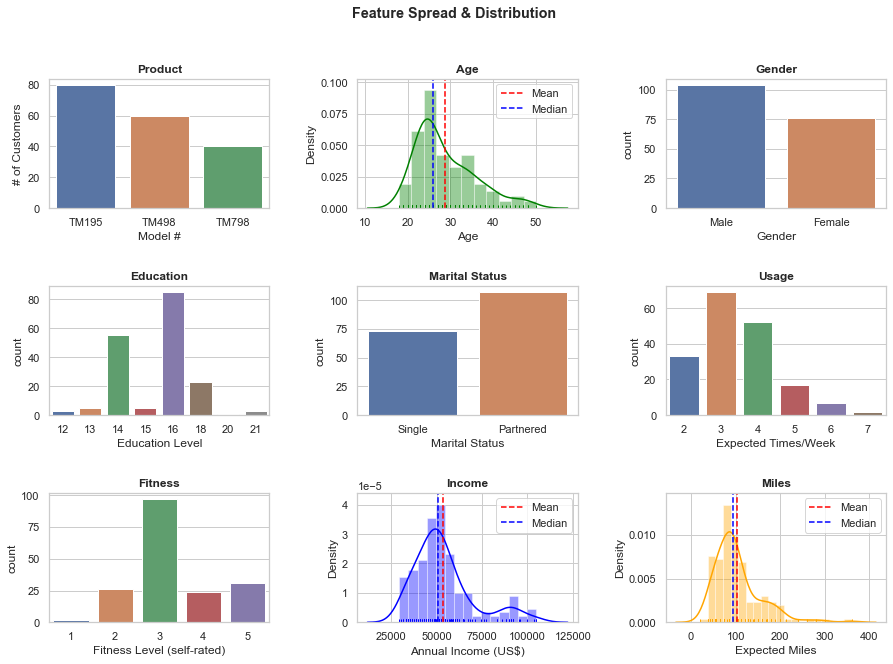

In [16]:
# create one master plot containing subplots showing spread/distribution of each feature
# master plot will be a 3x3 grid of subplots since there are 9 features

fig1 = plt.figure(figsize=[15,10])
fig1.suptitle("Feature Spread & Distribution", fontweight='bold')
fig1.subplots_adjust(hspace=0.6, wspace=0.4)

feat1 = fig1.add_subplot(3,3,1)
sns.countplot(x='Product', data=cardiodata, ax=feat1)
feat1.set_title('Product', fontweight='bold')
feat1.set_xlabel('Model #')
feat1.set_ylabel('# of Customers')

feat2 = fig1.add_subplot(3,3,2)
sns.distplot(cardiodata['Age'], rug=True, ax=feat2, color='green')
feat2.set_title('Age', fontweight='bold')
feat2.set_xlabel('Age')
feat2.axvline(cardiodata['Age'].mean(), color='red', linestyle='--', label='Mean')
feat2.axvline(cardiodata['Age'].median(), color='blue', linestyle='--', label='Median')
feat2.legend()

feat3 = fig1.add_subplot(3,3,3)
sns.countplot(x='Gender', data=cardiodata, ax=feat3)
feat3.set_title('Gender', fontweight='bold')
feat3.set_xlabel('Gender')

feat4 = fig1.add_subplot(3,3,4)
sns.countplot(x='Education', data=cardiodata, ax=feat4)
feat4.set_title('Education', fontweight='bold')
feat4.set_xlabel('Education Level')

feat5 = fig1.add_subplot(3,3,5)
sns.countplot(x='MaritalStatus', data=cardiodata, ax=feat5)
feat5.set_title('Marital Status', fontweight='bold')
feat5.set_xlabel('Marital Status')

feat6 = fig1.add_subplot(3,3,6)
sns.countplot(x='Usage', data=cardiodata, ax=feat6)
feat6.set_title('Usage', fontweight='bold')
feat6.set_xlabel('Expected Times/Week')

feat7 = fig1.add_subplot(3,3,7)
sns.countplot(x='Fitness', data=cardiodata, ax=feat7)
feat7.set_title('Fitness', fontweight='bold')
feat7.set_xlabel('Fitness Level (self-rated)')

feat8 = fig1.add_subplot(3,3,8)
sns.distplot(cardiodata['Income'], rug=True, ax=feat8, color='blue')
feat8.set_title('Income', fontweight='bold')
feat8.set_xlabel('Annual Income (US$)')
feat8.axvline(cardiodata['Income'].mean(), color='red', linestyle='--', label='Mean')
feat8.axvline(cardiodata['Income'].median(), color='blue', linestyle='--', label='Median')
feat8.legend()

feat9 = fig1.add_subplot(3,3,9)
sns.distplot(cardiodata['Miles'], rug=True, ax=feat9, color='orange')
feat9.set_title('Miles', fontweight='bold')
feat9.set_xlabel('Expected Miles')
feat9.axvline(cardiodata['Miles'].mean(), color='red', linestyle='--', label='Mean')
feat9.axvline(cardiodata['Miles'].median(), color='blue', linestyle='--', label='Median')
feat9.legend()

fig1.show();

#### Observations:
- Model TM195 shows highest number of sales (assuming this is a basic/starter model).
- Model TM798 shows lowest number of sales (assuming this is a high performance model).
- Mean age is about 29 while median age is 26; age distribution is positively skewed.
- Overall customer base made up of more male users then female users.
- Majority of customers have atleast 14 years of education (i.e. college students and graduates).
- Overall customer base made up of more married/partnered users than single users.
- Majority of customers expected to use between 3-4 times per week.
- Majority of customers self-rated as having average fitness level.
- Mean income is about $53K; income distribution is positively skewed.
- Mean expected mileage is about 103 miles; mileage distribution is positively skewed.

## Perform Multivariate Data Analysis

In [17]:
cardiodata.corr().round(3)   # check correlations between numerical features

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000,0.280,0.015,0.061,0.513,0.037
Education,0.280,1.000,0.395,0.411,0.626,0.307
Usage,0.015,0.395,1.000,0.669,0.520,0.759
Fitness,0.061,0.411,0.669,1.000,0.535,0.786
Income,0.513,0.626,0.520,0.535,1.000,0.543
Miles,0.037,0.307,0.759,0.786,0.543,1.000


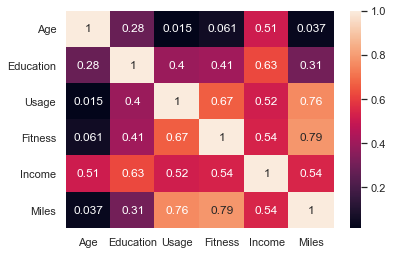

In [18]:
sns.heatmap(cardiodata.corr(), annot=True);   # check correlations between numerical features

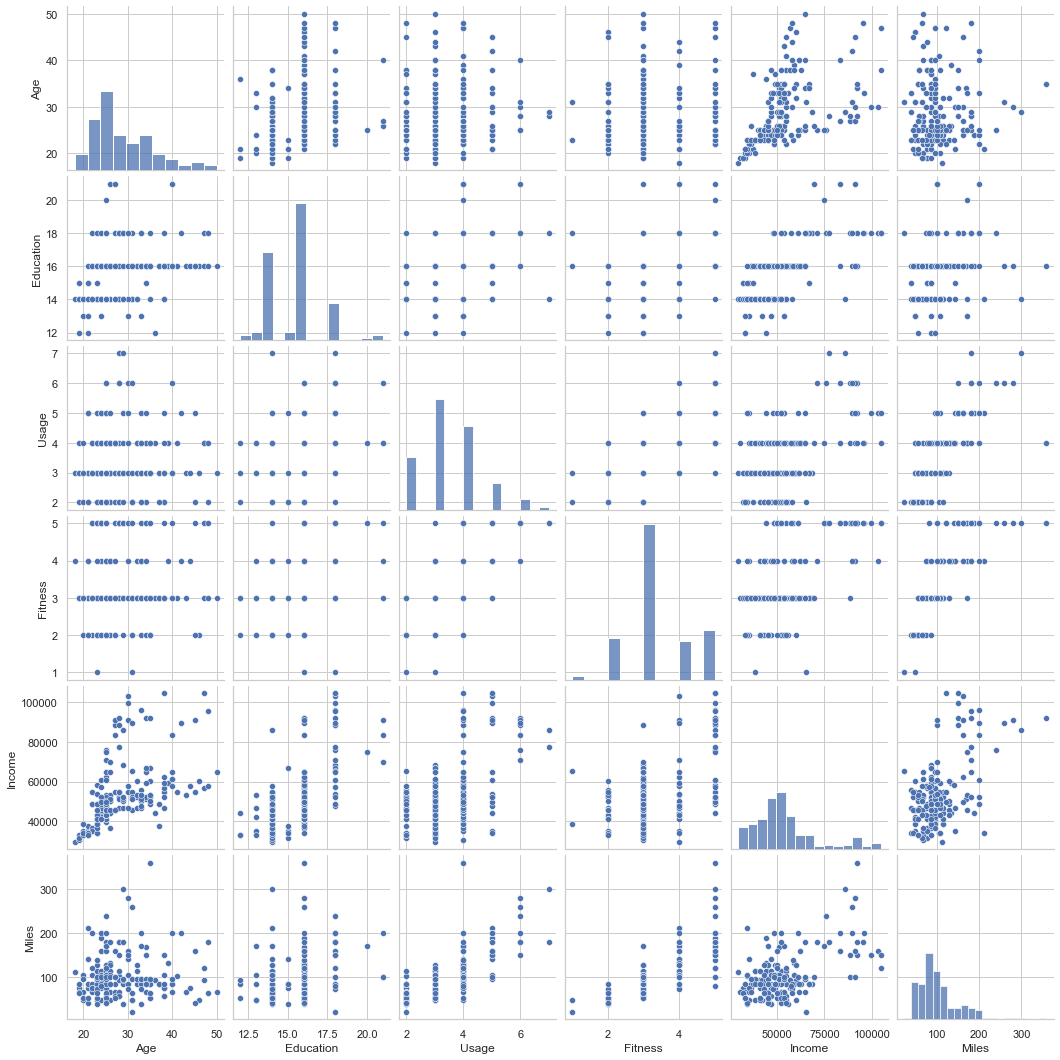

In [19]:
sns.pairplot(cardiodata);   # check scatter plots for pairwise relationships between features 

#### Observations:
- There seem to be correlations between Usage, Fitness, Income and Miles.

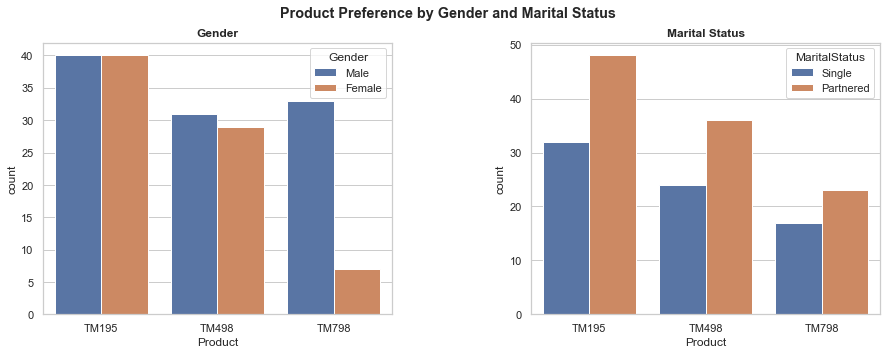

In [20]:
# create bivariate plots comparing Gender and Marital Status across the 3 Products

fig2 = plt.figure(figsize=[15,5])
fig2.suptitle("Product Preference by Gender and Marital Status", fontweight='bold')
fig2.subplots_adjust(hspace=0.6, wspace=0.4)

feat10 = fig2.add_subplot(1,2,1)
sns.countplot(x='Product', hue='Gender', data=cardiodata);
feat10.set_title('Gender', fontweight='bold')

feat11 = fig2.add_subplot(1,2,2)
sns.countplot(x='Product', hue='MaritalStatus', data=cardiodata);
feat11.set_title('Marital Status', fontweight='bold')

fig2.show();

#### Observations:
- Both models TM195 and TM498 show equal preference/usage between male and female customers.
- Whereas Model TM798 is predominantly used by male customers.
- Across all 3 product lines, there are more married/partnered customers than single customers. 

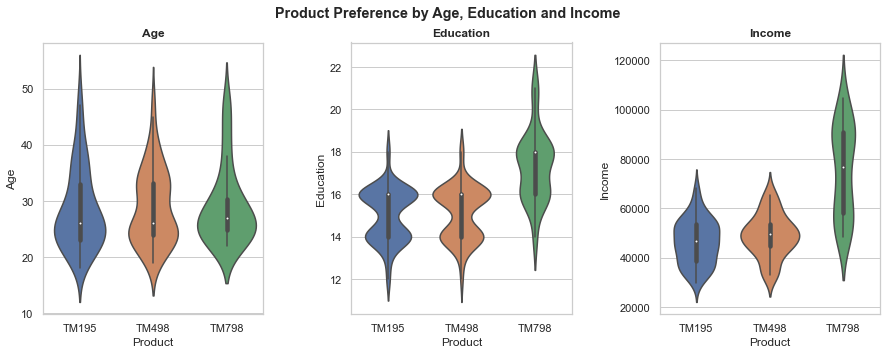

In [21]:
# create bivariate plots comparing Age, Education and Income across the 3 Products

fig3 = plt.figure(figsize=[15,5])
fig3.suptitle("Product Preference by Age, Education and Income", fontweight='bold')
fig3.subplots_adjust(hspace=0.6, wspace=0.4)

feat12 = fig3.add_subplot(1,3,1)
sns.violinplot(x='Product', y='Age', data=cardiodata);
feat12.set_title('Age', fontweight='bold')

feat13 = fig3.add_subplot(1,3,2)
sns.violinplot(x='Product', y='Education', data=cardiodata);
feat13.set_title('Education', fontweight='bold')

feat14 = fig3.add_subplot(1,3,3)
sns.violinplot(x='Product', y='Income', data=cardiodata);
feat14.set_title('Income', fontweight='bold')

fig3.show();

#### Observations:
- Age distribution is very similar across all 3 product lines.
- Model TM195/TM498 customers have between 14-16 years of education so most likely college students.
- Model TM798 customers tend to be more educated (> 16 years) so most likely college graduates with Bachelors degrees.
- Naturally it can be inferred that TM798 customers also earn higher incomes.

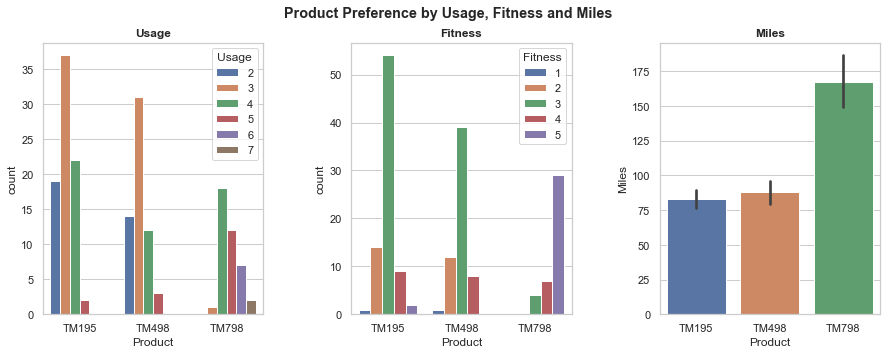

In [22]:
# create bivariate plots comparing Usage, Fitness and Miles across the 3 Products

fig4 = plt.figure(figsize=[15,5])
fig4.suptitle("Product Preference by Usage, Fitness and Miles", fontweight='bold')
fig4.subplots_adjust(hspace=0.6, wspace=0.4)

feat15 = fig4.add_subplot(1,3,1)
sns.countplot(x='Product', hue='Usage', data=cardiodata);
feat15.set_title('Usage', fontweight='bold')

feat16 = fig4.add_subplot(1,3,2)
sns.countplot(x='Product', hue='Fitness', data=cardiodata);
feat16.set_title('Fitness', fontweight='bold')

feat17 = fig4.add_subplot(1,3,3)
sns.barplot(x='Product', y='Miles', data=cardiodata);
feat17.set_title('Miles', fontweight='bold')

fig4.show();

#### Observations:
- Model TM195/TM498 customers anticipate usage between 2-4 times per week; more casual usage.
- Model TM798 customers anticpate usage between 4-7 times per week; more dedicated and rigorous usage.
- Model TM195/TM498 customers identify as having average fitness levels and expect to run about 80 miles per week.
- Model TM798 customers identify as very fit and expect to run double the distance at about 160 miles per week.

## Findings & Recommendations

### Customer Profile by Product Line

Model TM195
- Most popular affordable model generating highest sales.
- Appeals mainly to college students and those making less than $60,000 annually.
- Preferred by male and female customers equally.
- Majority of customers are married/partnered.
- Targeted for casual/beginner customers having low to average fitness levels. 

Model TM498
- Very similarly positioned as Model TM195 (assuming mid-tier model).
- Appeals mainly to college students and those making less than $60,000 annually.
- Preferred by male and female customers equally.
- Majority of customers are married/partnered.
- Targeted for casual/beginner customers having low to average fitness levels.

Model TM798
- Generated lowest sales (assuming high performance model having higher price point).
- Appeals mainly to college graduates and those making more than $60,000 annually.
- Preferred predominantly by male customers; need to understand why missing out on female segment.
- Majority of customers are married/partnered.
- Targeted for intermediate/advanced customers having average to high fitness levels. 

### More Information Needed
- Compare and contrast differences between each model (i.e. features, capabilities, "bells and whistles", etc).
- Understand pricing models and profit margins for each model.
- Identify potential new customer segments based on Gender, Age and Income. 